# Understanding the modal shifting and travel delays under short-term transport disruption – a case study of London tube strike

In [4]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
from defined_methods import merge_csv, merge_csv_flow

# Data preparation

(500648.6269499996, 564876.9020499996, 153596.6433500004, 203188.04565000077)

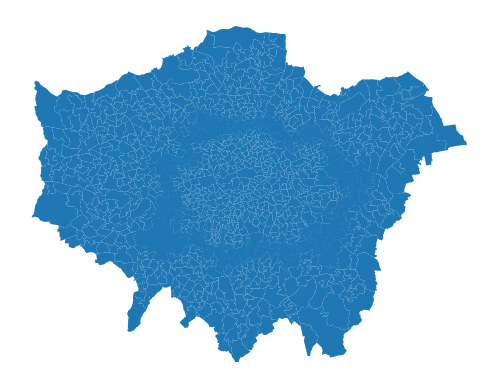

In [5]:
# read the administrative relationship encoding file
admin_rel = pd.read_csv(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UnitedNationsDevelopmentProgramme/Paper/Tube Strike Behaviour/oa_lsoa_msoa_la_trans.csv')

# read the spatial administrative boundary files
oa = gpd.read_file(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UnitedNationsDevelopmentProgramme/Paper/Tube Strike Behaviour/lon_oa.gpkg')
# lsoa = gpd.read_file(
#     '/Users/zonghe/Library/CloudStorage/OneDrive-UnitedNationsDevelopmentProgramme/Paper/Tube Strike Behaviour/lon_lsoa.gpkg')
msoa = gpd.read_file(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UnitedNationsDevelopmentProgramme/Paper/Tube Strike Behaviour/lon_msoa.gpkg')

inoutter = '/Users/zonghe/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Zonghe Ma/Zonghe Ma-STA-Investigating the relationship between modal shifting and road transport resilience under Tube strikes/Raw data/London administrative boundaries/lp-consultation-oct-2009-inner-outer-london-shp/lp-consultation-oct-2009-inner-outer-london.shp'
inoutter = gpd.read_file(inoutter)
inoutter.to_crs(epsg=27700, inplace=True)
msoa = gpd.sjoin(msoa, inoutter[['Boundary','geometry']], how='inner', predicate='intersects')
msoa.drop(columns=['index_right'], inplace=True)
msoa.rename(columns={'Boundary':'inout'}, inplace=True)

msoa.plot()
plt.axis('off')

In [6]:
msoa

msoa21cd                  msoa21nm      area    lad21cd  \
0    E02000001        City of London 001  3.150420  E09000001   
14   E02000016  Barking and Dagenham 015  0.912838  E09000002   
18   E02000020  Barking and Dagenham 019  4.356232  E09000002   
47   E02000056                Barnet 033  3.227097  E09000003   
52   E02000061                Barnet 038  1.586996  E09000003   
..         ...                       ...       ...        ...   
982  E02006996                Newham 039  0.961216  E09000025   
988  E02007017             Redbridge 037  0.902721  E09000026   
989  E02007018             Redbridge 038  0.611776  E09000026   
990  E02007019             Redbridge 039  0.625062  E09000026   
991  E02007020             Redbridge 040  0.646777  E09000026   

                  lad21nm                                           geometry  \
0          City of London  MULTIPOLYGON (((532153.703 182165.155, 532158....   
14   Barking and Dagenham  MULTIPOLYGON (((544113.724 184901.614, 544129....   
18   Barking and Dagenham  MULTIPOLYGON (((545806.481 184158.048, 545806....   
47                 Barnet  MULTIPOLYGON (((526205.572 189702.450, 526206....   
52                 Barnet  MULTIPOLYGON (((525444.000 187924.001, 525463....   
..                    ...                                                ...   
982                Newham  MULTIPOLYGON (((539125.938 185568.297, 539127....   
988             Redbridge  MULTIPOLYGON (((547877.832 189038.795, 547890....   
989             Redbridge  MULTIPOLYGON (((547178.363 188495.275, 547179....   
990             Redbridge  MULTIPOLYGON (((545236.938 186626.031, 545228....   
991             Redbridge  MULTIPOLYGON (((544413.533 186611.023, 544416....   

            inout  
0    Inner London  
14   Inner London  
18   Inner London  
47   Inner London  
52   Inner London  
..            ...  
982  Outer London  
988  Outer London  
989  Outer London  
990  Outer London  
991  Outer London  

[1149 rows x 7 columns]

## Behavioural data

In [7]:
device = merge_csv(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UnitedNationsDevelopmentProgramme/Paper/Tube Strike Behaviour/travel_info_oa/device')
stay_time = merge_csv(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UnitedNationsDevelopmentProgramme/Paper/Tube Strike Behaviour/travel_info_oa/stay time')
travel_time = merge_csv(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UnitedNationsDevelopmentProgramme/Paper/Tube Strike Behaviour/travel_info_oa/travel time')
# drop the na values in the stay time dataset
stay_time = stay_time.dropna()
# convert the stay time from seconds to hours
stay_time['stay_time'] = stay_time['stay_time'].astype(int) / 3600

# Filtering for March 1, 2022, and March 3, 2022

device_313 = device[(device['date'] == '02/22/22') | (device['date'] == '03/01/22') | (
            device['date'] == '03/03/22')].copy().reset_index(drop=True)
device_313['date'] = pd.to_datetime(device_313['date'], format='%m/%d/%y').dt.strftime('%m/%d/%y')

stay_time_313 = stay_time[(stay_time['date'] == '02/22/22') | (stay_time['date'] == '03/01/22') | (
            stay_time['date'] == '03/03/22')].copy().reset_index(
    drop=True)
stay_time_313['date'] = pd.to_datetime(stay_time_313['date'], format='%m/%d/%y').dt.strftime('%m/%d/%y')

travel_time_313 = travel_time[
    (travel_time['date'] == '02/22/22') | (travel_time['date'] == '03/01/22') | (
                travel_time['date'] == '03/03/22')].copy().reset_index(drop=True)
travel_time_313['date'] = pd.to_datetime(travel_time_313['date'], format='%m/%d/%y').dt.strftime('%m/%d/%y')

### Device related behavioral test

In [8]:
# Device related behavioral test
test_device_lable = device_313['startid'].unique()[1]
# print(test_device_lable)
test_device = device_313[device_313['startid'] == test_device_lable]
# print(test_device)
test_device_stay = stay_time_313[stay_time_313['startid'] == test_device_lable]
# print(test_device_stay)
test_device_modes = travel_time_313[travel_time_313['startid'] == test_device_lable]
# print(test_device_travel)
# merge the test device status, stay time and travel time
test_device_status = pd.merge(test_device, test_device_stay, on=['startid', 'date', 'oa21cd', 'device_type'],
                              how='left')
test_device = test_device.drop_duplicates().reset_index(drop=True)
test_device_status

startid     oa21cd  device_type  \
0   1000037686428573366468895824408367961791352836...  E00008360     resident   
1   1000037686428573366468895824408367961791352836...  E00182134   attraction   
2   1000037686428573366468895824408367961791352836...  E00165792  passthrough   
3   1000037686428573366468895824408367961791352836...  E00182335  passthrough   
4   1000037686428573366468895824408367961791352836...  E00008348  passthrough   
..                                                ...        ...          ...   
77  1000037686428573366468895824408367961791352836...  E00182369  passthrough   
78  1000037686428573366468895824408367961791352836...  E00182143  passthrough   
79  1000037686428573366468895824408367961791352836...  E00182082  passthrough   
80  1000037686428573366468895824408367961791352836...  E00008335  passthrough   
81  1000037686428573366468895824408367961791352836...  E00008342  passthrough   

        date  stay_time  
0   03/01/22  18.706667  
1   03/01/22   1.637222  
2   03/01/22        NaN  
3   03/01/22        NaN  
4   03/01/22        NaN  
..       ...        ...  
77  02/22/22        NaN  
78  02/22/22        NaN  
79  02/22/22        NaN  
80  02/22/22        NaN  
81  02/22/22        NaN  

[82 rows x 5 columns]

In [9]:
test_device_modes

stripid                                            startid  \
6            7.0  1000037686428573366468895824408367961791352836...   
7            8.0  1000037686428573366468895824408367961791352836...   
8            9.0  1000037686428573366468895824408367961791352836...   
9           10.0  1000037686428573366468895824408367961791352836...   
671873       9.0  1000037686428573366468895824408367961791352836...   
671874      10.0  1000037686428573366468895824408367961791352836...   
671875      10.0  1000037686428573366468895824408367961791352836...   
671876      10.0  1000037686428573366468895824408367961791352836...   
671877      11.0  1000037686428573366468895824408367961791352836...   
671878      12.0  1000037686428573366468895824408367961791352836...   
671879      12.0  1000037686428573366468895824408367961791352836...   
671880      12.0  1000037686428573366468895824408367961791352836...   
1331381     15.0  1000037686428573366468895824408367961791352836...   
1331382     16.0  1000037686428573366468895824408367961791352836...   
1331383     16.0  1000037686428573366468895824408367961791352836...   
1331384     17.0  1000037686428573366468895824408367961791352836...   
1331385     18.0  1000037686428573366468895824408367961791352836...   

        update_mode       time   distance      date  
6        stationary   0.665556   0.018822  02/22/22  
7               bus   0.636667   4.089392  02/22/22  
8        stationary   2.395556   0.114461  02/22/22  
9               car   5.403056  70.338298  02/22/22  
671873   stationary  15.381389   0.137395  03/03/22  
671874          bus   0.168333   1.912748  03/03/22  
671875          car   0.090556   1.032638  03/03/22  
671876        walks   0.556944   1.475602  03/03/22  
671877   stationary   0.340000   0.019648  03/03/22  
671878          bus   0.168056   2.218855  03/03/22  
671879          car   0.085000   0.723929  03/03/22  
671880        walks   5.565000   1.949898  03/03/22  
1331381  stationary  14.724722   0.130730  03/01/22  
1331382         car   0.360833   3.914328  03/01/22  
1331383       walks   0.345833   0.600829  03/01/22  
1331384  stationary   1.637222   0.064496  03/01/22  
1331385         car   5.500833   5.598632  03/01/22

### Behavioural data processing

In [10]:
device_313_status = pd.merge(device_313, stay_time_313, on=['startid', 'date', 'oa21cd', 'device_type'], how='left')
device_313_status = device_313_status.drop_duplicates().reset_index(drop=True)

# insert the MSOA and LSOA column from 'admin_rel'
device_313_status = pd.merge(device_313_status, admin_rel[['oa21cd', 'msoa21cd', 'lsoa21cd']], on=['oa21cd'],
                             how='left')
device_313_status = device_313_status.drop_duplicates().reset_index(drop=True)

device_313_modes = travel_time_313.groupby(['startid', 'date', 'update_mode']).agg(
    {'time': 'sum', 'distance': 'sum'}).reset_index()

In [11]:
device_313_status

startid     oa21cd  \
0        1000015989590377328043415348373664771294182405...  E00018694   
1        1000037686428573366468895824408367961791352836...  E00008360   
2        1000056811909521100485295490854336441641125953...  E00013578   
3        1000064961804232476337777826703284484305799106...  E00007278   
4        1000071212051388806025932869511590862120065353...  E00008696   
...                                                    ...        ...   
7804985  9999986042492829152298314924974521522262434004...  E00000677   
7804986  9999986042492829152298314924974521522262434004...  E00000681   
7804987  9999986042492829152298314924974521522262434004...  E00000685   
7804988  9999991853406953377520742942162885721692630532...  E00014909   
7804989  9999991853406953377520742942162885721692630532...  E00009583   

         device_type      date  stay_time   msoa21cd   lsoa21cd  
0           resident  03/01/22   8.210000  E02006800  E01003714  
1           resident  03/01/22  18.706667  E02006786  E01032567  
2           resident  03/01/22   4.663889  E02000575  E01002726  
3           resident  03/01/22  23.500278  E02006793  E01001458  
4           resident  03/01/22  23.540278  E02000364  E01035640  
...              ...       ...        ...        ...        ...  
7804985  passthrough  02/22/22        NaN  E02000062  E01000141  
7804986  passthrough  02/22/22        NaN  E02000062  E01000141  
7804987  passthrough  02/22/22        NaN  E02000062  E01000141  
7804988  passthrough  02/22/22        NaN  E02000603  E01002960  
7804989  passthrough  02/22/22        NaN  E02000395  E01001916  

[7804990 rows x 7 columns]

In [12]:
device_313_modes

startid      date  \
0       1000015989590377328043415348373664771294182405...  02/22/22   
1       1000015989590377328043415348373664771294182405...  02/22/22   
2       1000015989590377328043415348373664771294182405...  02/22/22   
3       1000015989590377328043415348373664771294182405...  03/01/22   
4       1000015989590377328043415348373664771294182405...  03/01/22   
...                                                   ...       ...   
818147  9999986042492829152298314924974521522262434004...  02/22/22   
818148  9999986042492829152298314924974521522262434004...  03/01/22   
818149  9999986042492829152298314924974521522262434004...  03/03/22   
818150  9999991853406953377520742942162885721692630532...  02/22/22   
818151  9999991853406953377520742942162885721692630532...  02/22/22   

       update_mode       time  distance  
0              car   0.728611  4.099752  
1       stationary  14.178333  0.122494  
2            walks   8.543889  5.940410  
3       stationary   8.210000  0.463290  
4            walks   0.794722  1.538798  
...            ...        ...       ...  
818147  stationary  20.183333  0.735870  
818148  stationary  23.807222  0.303220  
818149  stationary  23.602778  0.683795  
818150         car   0.012222  0.317155  
818151       walks   0.000278  0.000000  

[818152 rows x 5 columns]

# MSOA construction

## MSOA indicators

In [13]:
# merge dfs to aggrate at MSOA level
device_313_merged = pd.merge(device_313_status, device_313_modes, on=['date', 'startid'], how='left')
device_313_merged

startid     oa21cd  \
0         1000015989590377328043415348373664771294182405...  E00018694   
1         1000015989590377328043415348373664771294182405...  E00018694   
2         1000037686428573366468895824408367961791352836...  E00008360   
3         1000037686428573366468895824408367961791352836...  E00008360   
4         1000037686428573366468895824408367961791352836...  E00008360   
...                                                     ...        ...   
24679871  9999986042492829152298314924974521522262434004...  E00000685   
24679872  9999991853406953377520742942162885721692630532...  E00014909   
24679873  9999991853406953377520742942162885721692630532...  E00014909   
24679874  9999991853406953377520742942162885721692630532...  E00009583   
24679875  9999991853406953377520742942162885721692630532...  E00009583   

          device_type      date  stay_time   msoa21cd   lsoa21cd update_mode  \
0            resident  03/01/22   8.210000  E02006800  E01003714  stationary   
1            resident  03/01/22   8.210000  E02006800  E01003714       walks   
2            resident  03/01/22  18.706667  E02006786  E01032567         car   
3            resident  03/01/22  18.706667  E02006786  E01032567  stationary   
4            resident  03/01/22  18.706667  E02006786  E01032567       walks   
...               ...       ...        ...        ...        ...         ...   
24679871  passthrough  02/22/22        NaN  E02000062  E01000141  stationary   
24679872  passthrough  02/22/22        NaN  E02000603  E01002960         car   
24679873  passthrough  02/22/22        NaN  E02000603  E01002960       walks   
24679874  passthrough  02/22/22        NaN  E02000395  E01001916         car   
24679875  passthrough  02/22/22        NaN  E02000395  E01001916       walks   

               time  distance  
0          8.210000  0.463290  
1          0.794722  1.538798  
2          5.861667  9.512960  
3         16.361944  0.195226  
4          0.345833  0.600829  
...             ...       ...  
24679871  20.183333  0.735870  
24679872   0.012222  0.317155  
24679873   0.000278  0.000000  
24679874   0.012222  0.317155  
24679875   0.000278  0.000000  

[24679876 rows x 10 columns]

In [14]:
counts = device_313_merged.groupby(['date', 'msoa21cd', 'device_type']).size().reset_index(name='count')
counts = counts.pivot_table(index=['date', 'msoa21cd'], columns='device_type', values='count',
                            fill_value=0).reset_index()
counts.columns = [col if col in ['date', 'msoa21cd'] else f"{col}_count" for col in counts.columns]
counts

date   msoa21cd  attraction_count  passthrough_count  resident_count
0     02/22/22  E02000001             11604              48021             628
1     02/22/22  E02000002               220               4568             311
2     02/22/22  E02000003               494              12699             287
3     02/22/22  E02000004               405               3670             288
4     02/22/22  E02000005               418               6326             283
...        ...        ...               ...                ...             ...
3001  03/03/22  E02007111              1139              14468             148
3002  03/03/22  E02007112               161               6278              89
3003  03/03/22  E02007113               307              14741             112
3004  03/03/22  E02007114               292               3661             111
3005  03/03/22  E02007115               977              17002             372

[3006 rows x 5 columns]

In [15]:
counts_total = counts.groupby(['date']).agg({'resident_count': 'sum', 'attraction_count': 'sum',
                              'passthrough_count': 'sum'}).reset_index()
counts_total

date  resident_count  attraction_count  passthrough_count
0  02/22/22          214070            383685            7581248
1  03/01/22          207479            359714            7839451
2  03/03/22          213098            375179            7505952

In [16]:
# The units of 'time' and 'distance' are hours and kilometers, respectively

# Group by 'date' and 'msoa21xd', and aggregate 'time' and 'distance' by sum
triptd = device_313_merged.groupby(['date', 'msoa21cd', 'device_type']).agg(time_sum=('time', 'sum'), distance_sum=(
'distance', 'sum')).reset_index()
triptd[['time_sum', 'distance_sum']] = triptd[['time_sum', 'distance_sum']].round(2)

# Calculating mean values and renaming columns
triptd['time_mean'] = device_313_merged.groupby(['date', 'msoa21cd', 'device_type'])['time'].transform('mean').round(2)
triptd['distance_mean'] = device_313_merged.groupby(['date', 'msoa21cd', 'device_type'])['distance'].transform(
    'mean').round(2)
triptd = triptd.pivot_table(index=['date', 'msoa21cd'], columns='device_type',
                            values=['time_sum', 'time_mean', 'distance_sum', 'distance_mean'],
                            fill_value=0).reset_index()
triptd = triptd.rename_axis(None)
triptd.columns = [col if col in ['date', 'msoa21cd'] else f"{col[0]}_{col[1]}" for col in triptd.columns]
triptd.rename(columns={'date_': 'date', 'msoa21cd_': 'msoa21cd'}, inplace=True)
triptd_all = triptd.copy()

triptd = triptd[
    ['date', 'msoa21cd', 'distance_sum_resident', 'distance_mean_resident', 'time_sum_resident', 'time_mean_resident']]

triptd

date   msoa21cd  distance_sum_resident  distance_mean_resident  \
0     02/22/22  E02000001                7124.88                    7.44   
1     02/22/22  E02000002                2524.97                    5.89   
2     02/22/22  E02000003                3166.46                    5.89   
3     02/22/22  E02000004                2652.81                    5.53   
4     02/22/22  E02000005                2161.48                    8.03   
...        ...        ...                    ...                     ...   
3001  03/03/22  E02007111                1034.06                   10.12   
3002  03/03/22  E02007112                 368.06                   10.48   
3003  03/03/22  E02007113                 875.24                    9.16   
3004  03/03/22  E02007114                 698.69                    7.36   
3005  03/03/22  E02007115                2424.44                    8.57   

      time_sum_resident  time_mean_resident  
0               2975.78                7.35  
1               2326.70                6.57  
2               2086.40                6.57  
3               2030.57                7.39  
4               2159.26                7.23  
...                 ...                 ...  
3001             943.30                7.16  
3002             712.24                6.93  
3003             773.72                7.31  
3004             716.83                7.07  
3005            2432.14                7.58  

[3006 rows x 6 columns]

In [17]:
triptd_total = triptd.groupby(['date']).agg({'distance_sum_resident': 'sum', 'distance_mean_resident': 'mean',
                              'time_sum_resident': 'sum', 'time_mean_resident': 'mean'}).reset_index()
triptd_total

date  distance_sum_resident  distance_mean_resident  time_sum_resident  \
0  02/22/22             1746879.43                7.785898         1527447.23   
1  03/01/22             1607028.69                7.771148         1502381.53   
2  03/03/22             1678156.32                7.750389         1504081.66   

   time_mean_resident  
0            7.224431  
1            7.254800  
2            7.233782

In [18]:
triprate = device_313_merged.groupby(['date', 'msoa21cd', 'device_type', 'update_mode']).size().reset_index(
    name='count')
triprate = triprate[triprate['device_type'] == 'resident']
triprate = triprate.pivot_table(index=['date', 'msoa21cd'], columns='update_mode', values='count',
                                fill_value=0).reset_index()
triprate = triprate.rename_axis(None)
triprate_all = triprate.copy()

triprate['public_transportation'] = triprate['tube'] + triprate['bus'] + triprate['train']
triprate['movement'] = triprate['public_transportation'] + triprate['car'] + triprate['cycle'] + triprate['walks']

triprate_all = triprate.copy()

triprate['trip_rate'] = (triprate['movement'] / (triprate['movement'] + triprate['public_transportation']) * 100).round(2)

triprate['tube_to_public'] = (triprate['tube'] / triprate['public_transportation'] * 100).round(2)

triprate = triprate[['date', 'msoa21cd', 'trip_rate','tube_to_public']]

triprate

update_mode      date   msoa21cd  trip_rate  tube_to_public
0            02/22/22  E02000001      79.55           33.33
1            02/22/22  E02000002      86.10           19.35
2            02/22/22  E02000003      85.78           30.00
3            02/22/22  E02000004      88.78           13.04
4            02/22/22  E02000005      88.08           30.43
...               ...        ...        ...             ...
3001         03/03/22  E02007111      82.76           25.00
3002         03/03/22  E02007112      82.54           18.18
3003         03/03/22  E02007113      88.31           22.22
3004         03/03/22  E02007114      85.06           38.46
3005         03/03/22  E02007115      83.45           31.91

[3006 rows x 4 columns]

In [19]:
# merge all indicators to one dataframe with geometry
map_msoa = pd.merge(counts, triptd, on=['date', 'msoa21cd'], how='left')
map_msoa = pd.merge(map_msoa, triprate, on=['date', 'msoa21cd'], how='left')
map_msoa =pd.merge(map_msoa, msoa[['msoa21cd', 'msoa21nm', 'inout','geometry']], on=['msoa21cd'], how='left')
map_msoa = gpd.GeoDataFrame(map_msoa, geometry='geometry', crs='EPSG:27700')
map_msoa

date   msoa21cd  attraction_count  passthrough_count  \
0     02/22/22  E02000001             11604              48021   
1     02/22/22  E02000002               220               4568   
2     02/22/22  E02000003               494              12699   
3     02/22/22  E02000004               405               3670   
4     02/22/22  E02000005               418               6326   
...        ...        ...               ...                ...   
3442  03/03/22  E02007111              1139              14468   
3443  03/03/22  E02007112               161               6278   
3444  03/03/22  E02007113               307              14741   
3445  03/03/22  E02007114               292               3661   
3446  03/03/22  E02007115               977              17002   

      resident_count  distance_sum_resident  distance_mean_resident  \
0                628                7124.88                    7.44   
1                311                2524.97                    5.89   
2                287                3166.46                    5.89   
3                288                2652.81                    5.53   
4                283                2161.48                    8.03   
...              ...                    ...                     ...   
3442             148                1034.06                   10.12   
3443              89                 368.06                   10.48   
3444             112                 875.24                    9.16   
3445             111                 698.69                    7.36   
3446             372                2424.44                    8.57   

      time_sum_resident  time_mean_resident  trip_rate  tube_to_public  \
0               2975.78                7.35      79.55           33.33   
1               2326.70                6.57      86.10           19.35   
2               2086.40                6.57      85.78           30.00   
3               2030.57                7.39      88.78           13.04   
4               2159.26                7.23      88.08           30.43   
...                 ...                 ...        ...             ...   
3442             943.30                7.16      82.76           25.00   
3443             712.24                6.93      82.54           18.18   
3444             773.72                7.31      88.31           22.22   
3445             716.83                7.07      85.06           38.46   
3446            2432.14                7.58      83.45           31.91   

                      msoa21nm         inout  \
0           City of London 001  Inner London   
1     Barking and Dagenham 001  Outer London   
2     Barking and Dagenham 002  Outer London   
3     Barking and Dagenham 003  Outer London   
4     Barking and Dagenham 004  Outer London   
...                        ...           ...   
3442               Hackney 033  Inner London   
3443         Tower Hamlets 034  Inner London   
3444         Tower Hamlets 035  Inner London   
3445         Tower Hamlets 036  Inner London   
3446                Camden 029  Inner London   

                                               geometry  
0     MULTIPOLYGON (((532153.703 182165.155, 532158....  
1     MULTIPOLYGON (((548881.304 190819.980, 548881....  
2     MULTIPOLYGON (((548958.555 189072.176, 548954....  
3     MULTIPOLYGON (((551550.056 187364.705, 551528....  
4     MULTIPOLYGON (((549237.051 187627.941, 549241....  
...                                                 ...  
3442  MULTIPOLYGON (((533467.193 183307.131, 533467....  
3443  MULTIPOLYGON (((539048.000 181080.547, 539044....  
3444  MULTIPOLYGON (((538560.000 181083.000, 538575....  
3445  MULTIPOLYGON (((538406.587 180300.310, 538431....  
3446  MULTIPOLYGON (((530861.849 182330.810, 530861....  

[3447 rows x 14 columns]

In [24]:
def normalize_plot(gdf, column, cmap='coolwarm', legend=True):

    geo_df = gdf.copy()
    # Normalize the column
    min_val = geo_df[column].min()
    max_val = geo_df[column].max()
    geo_df[column + '_normalized'] = (geo_df[column] - min_val) / (max_val - min_val)

    # Plotting
    geo_df.plot(figsize=(10, 10), column=column + '_normalized', cmap=cmap, legend=legend)

    # Remove axis for better visual presentation
    plt.title(column)
    plt.axis('off')
    plt.show()


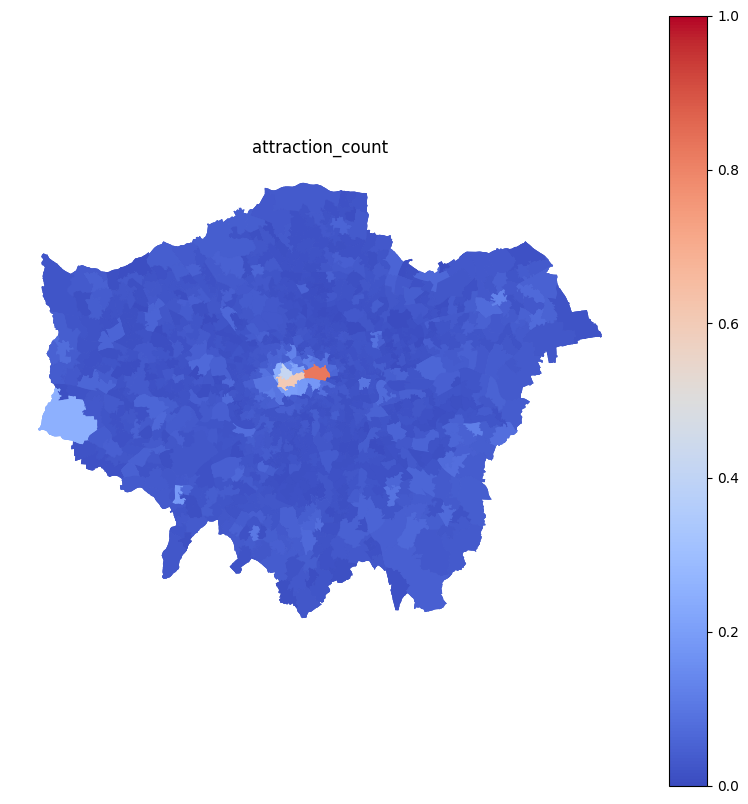

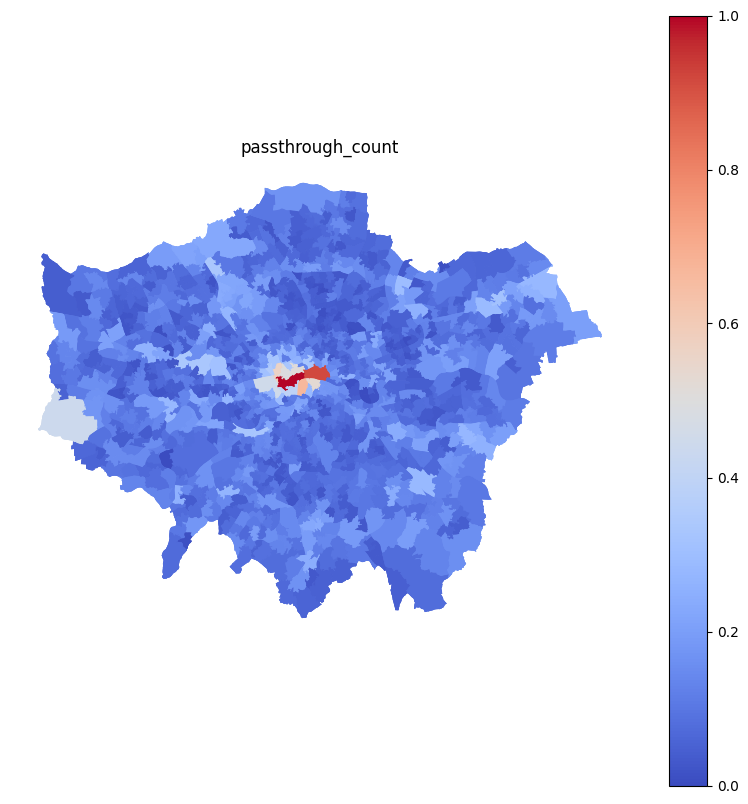

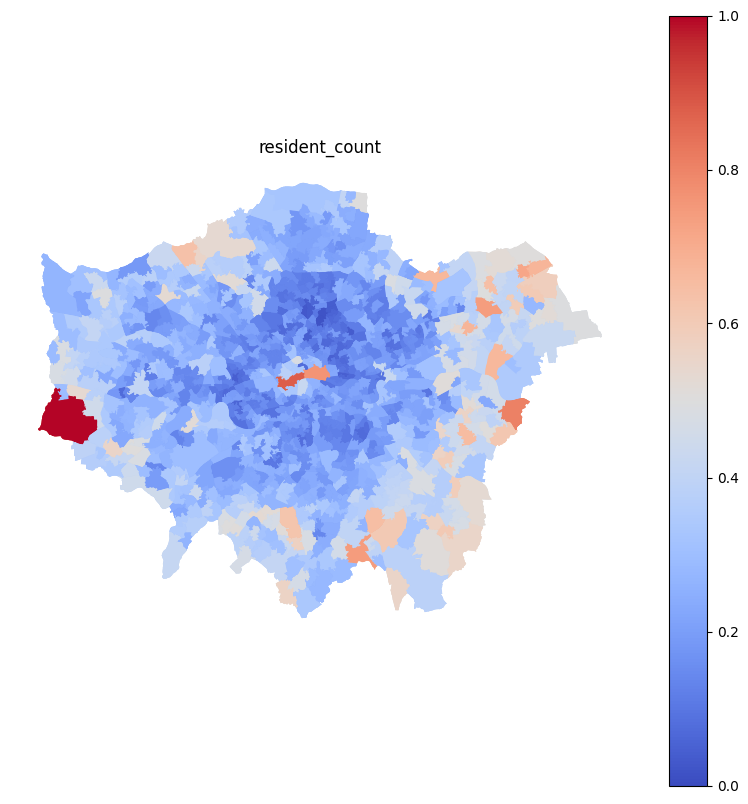

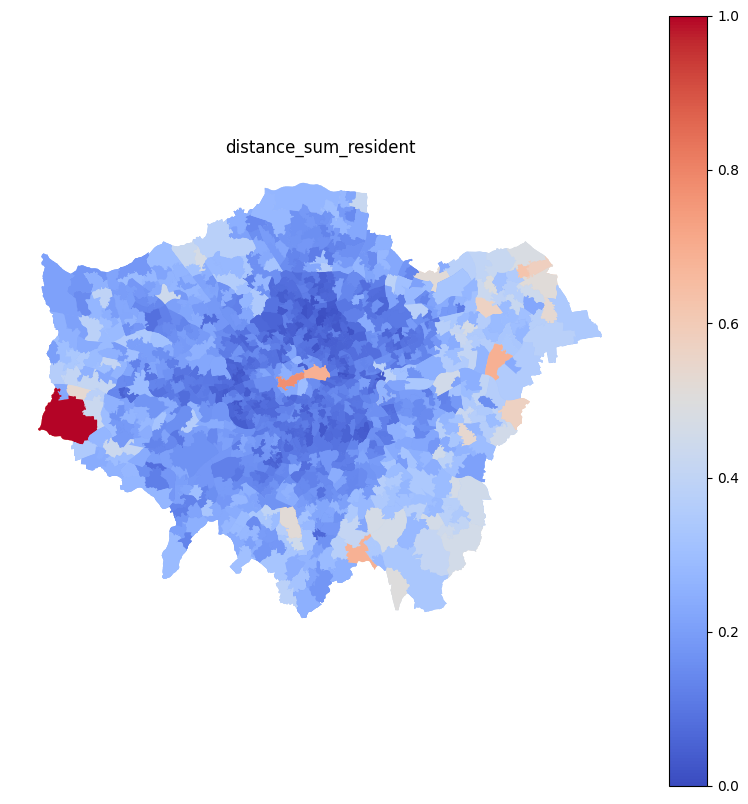

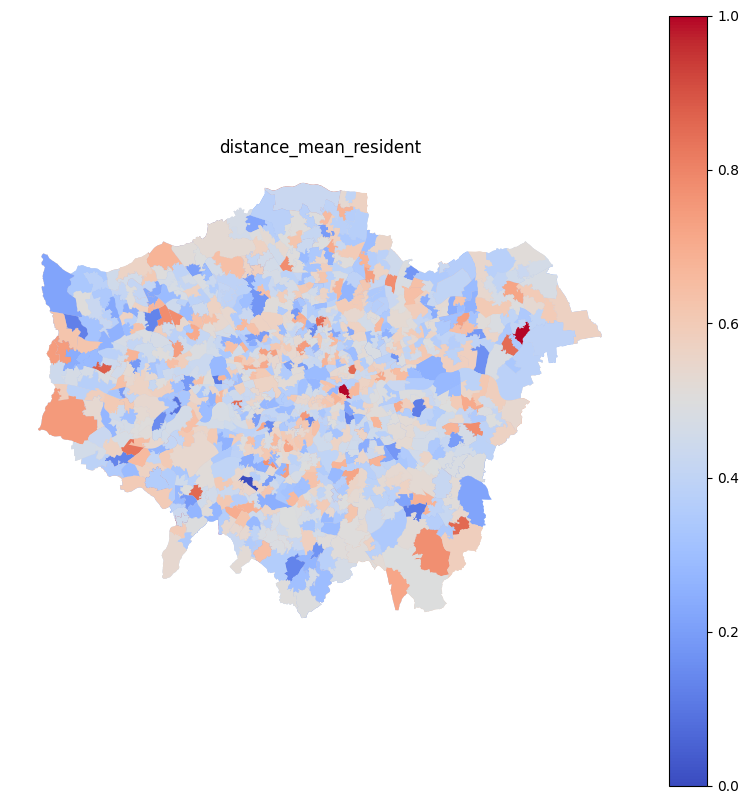

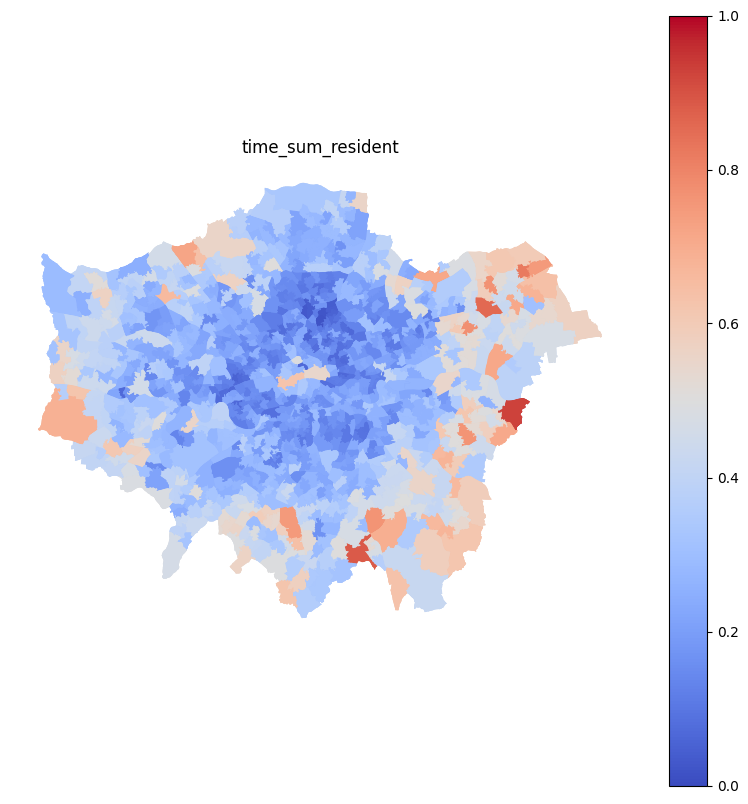

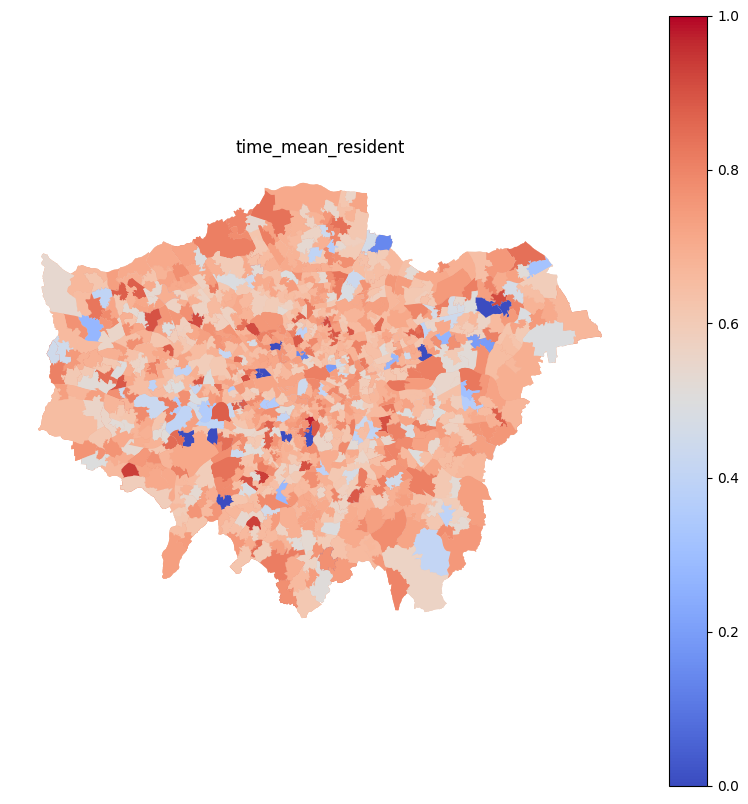

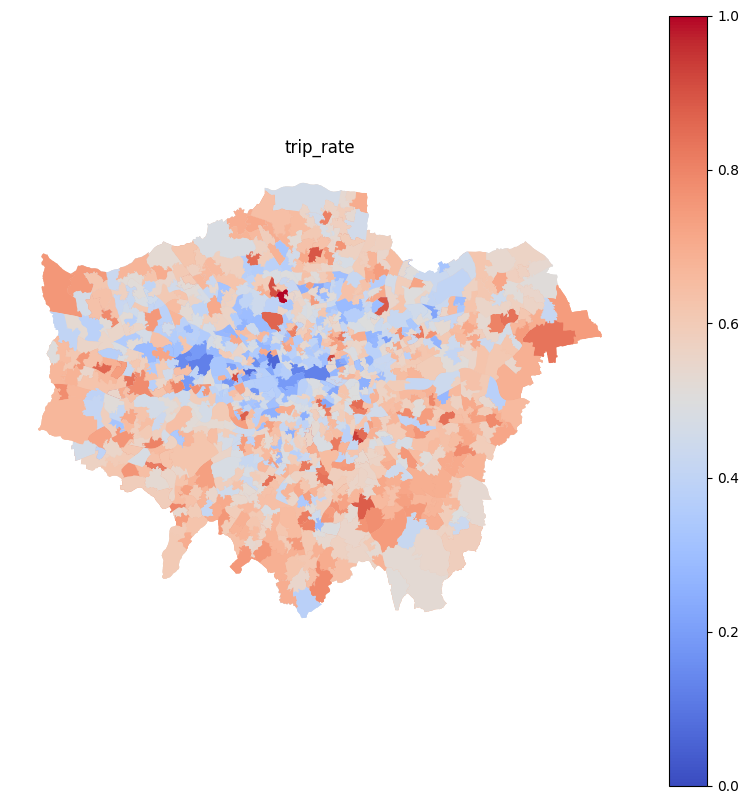

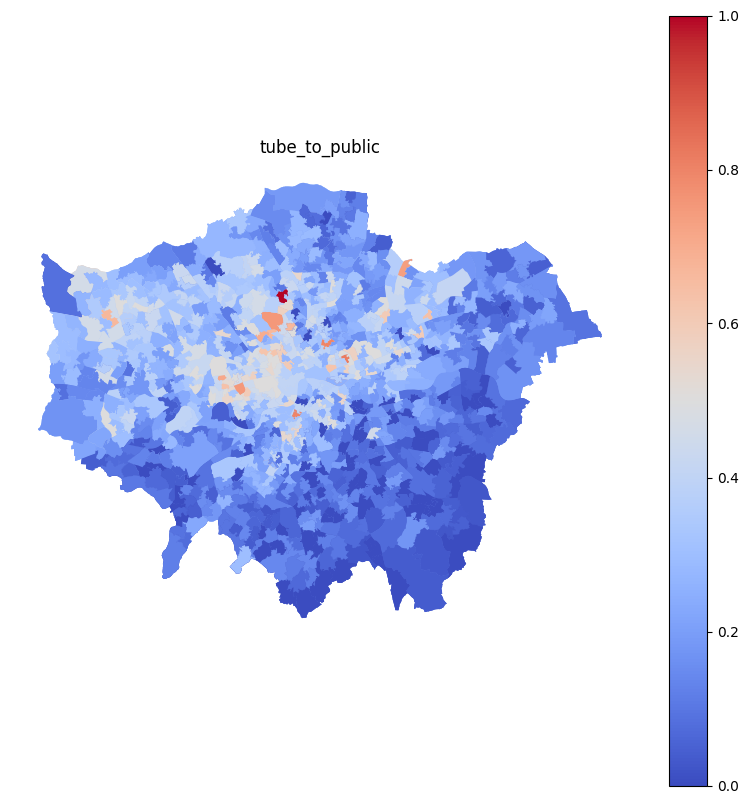

In [25]:
for col in map_msoa.columns:
    if col not in ['date','msoa21cd', 'msoa21nm', 'inout', 'geometry']:
        normalize_plot(map_msoa, col)

## LISA

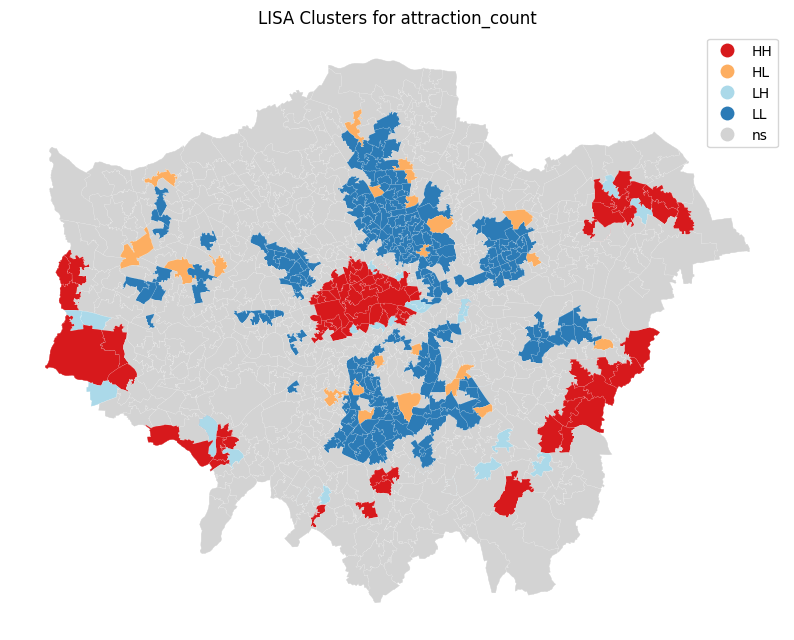

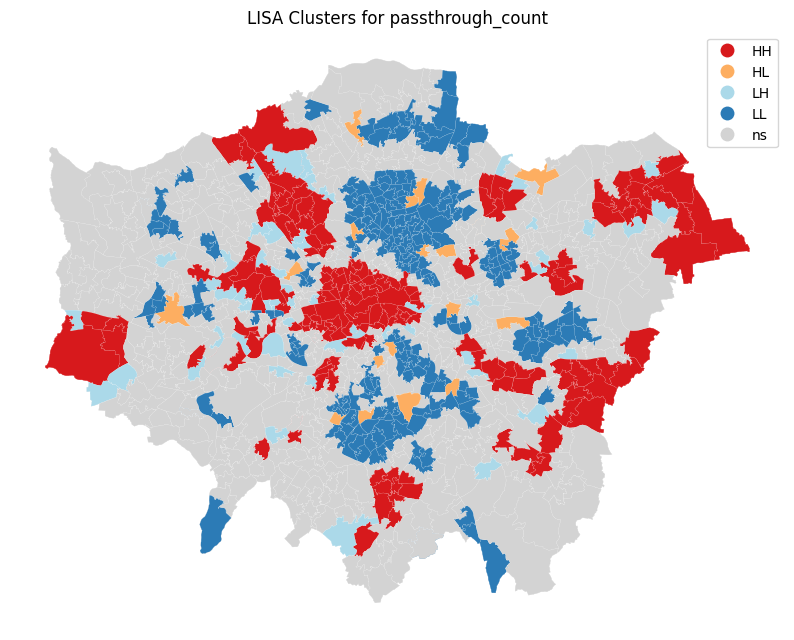

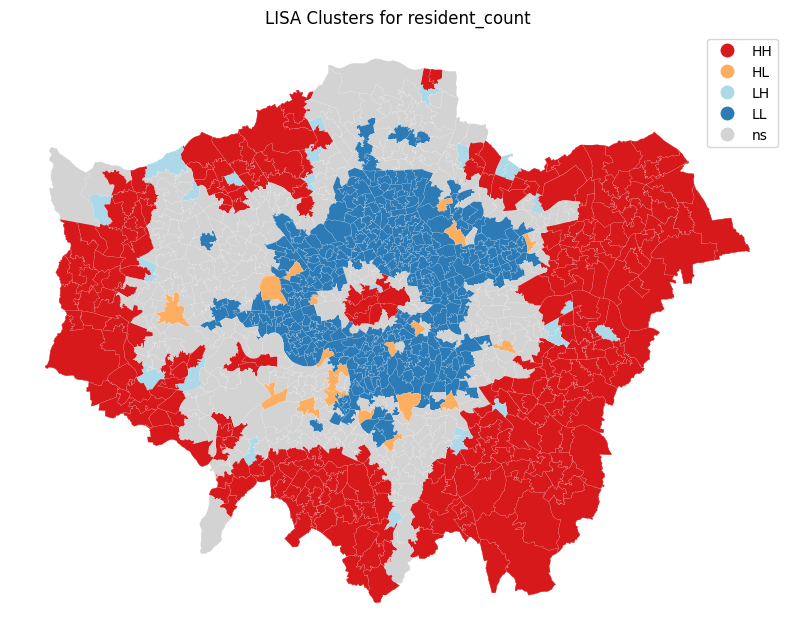

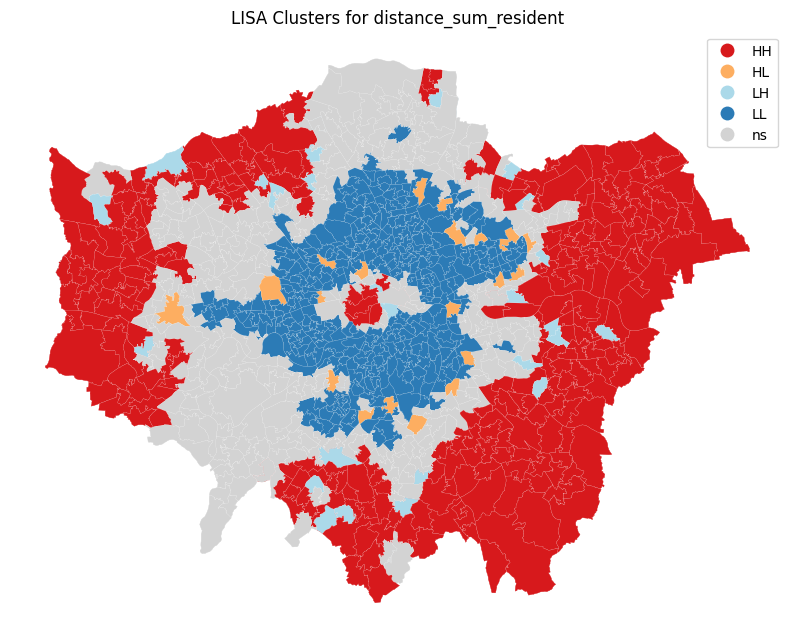

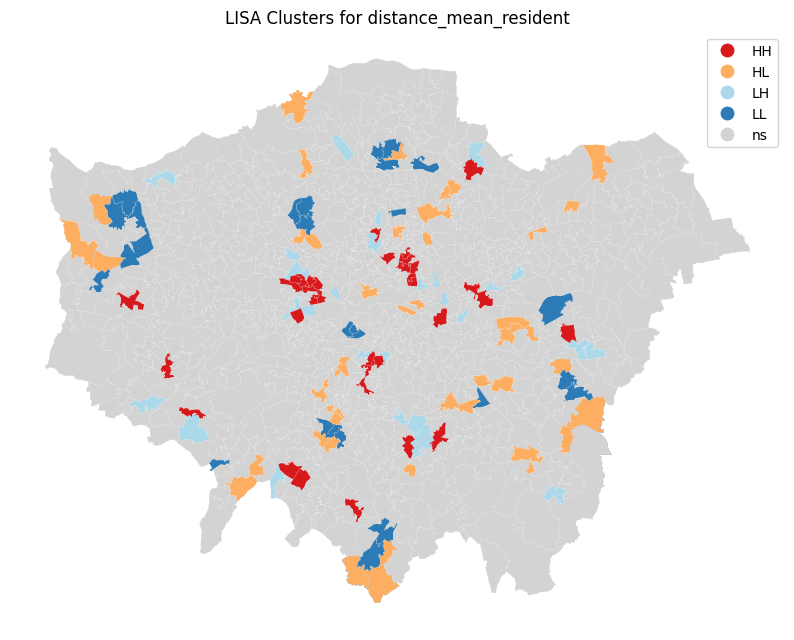

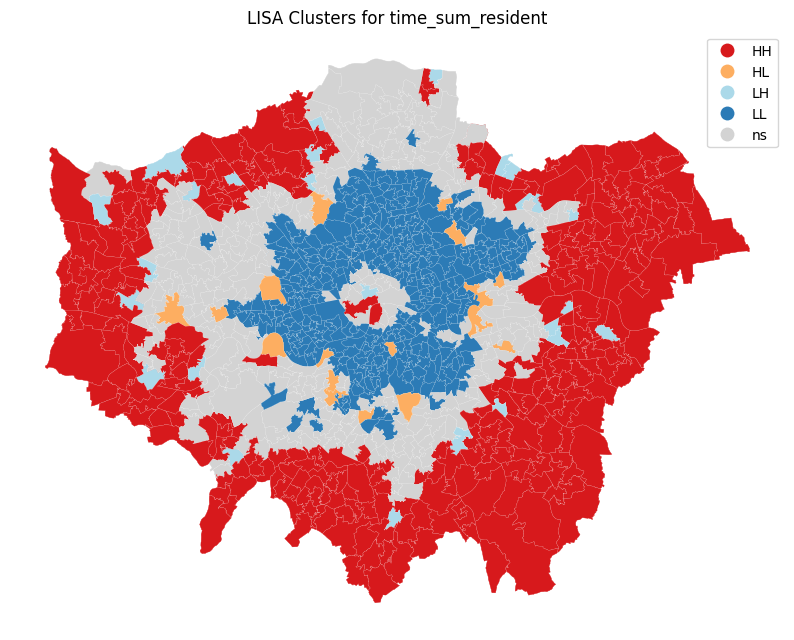

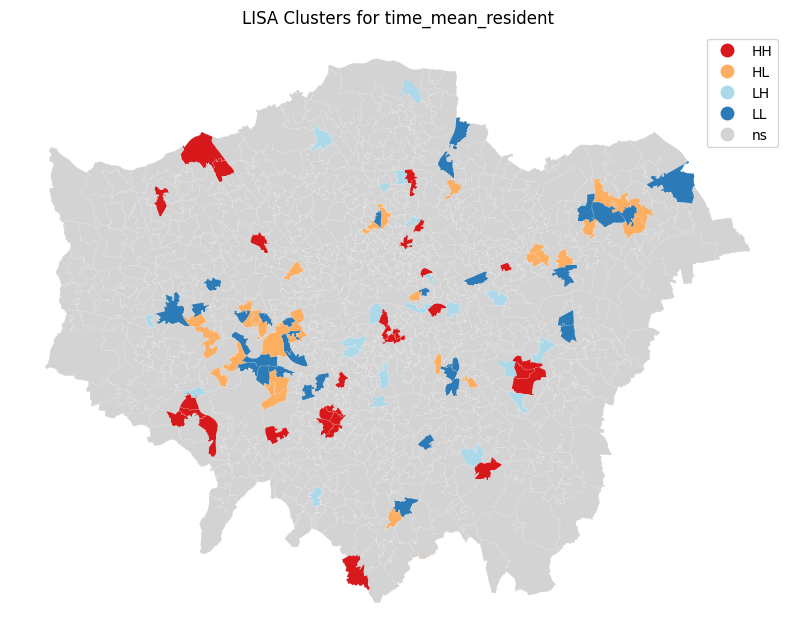

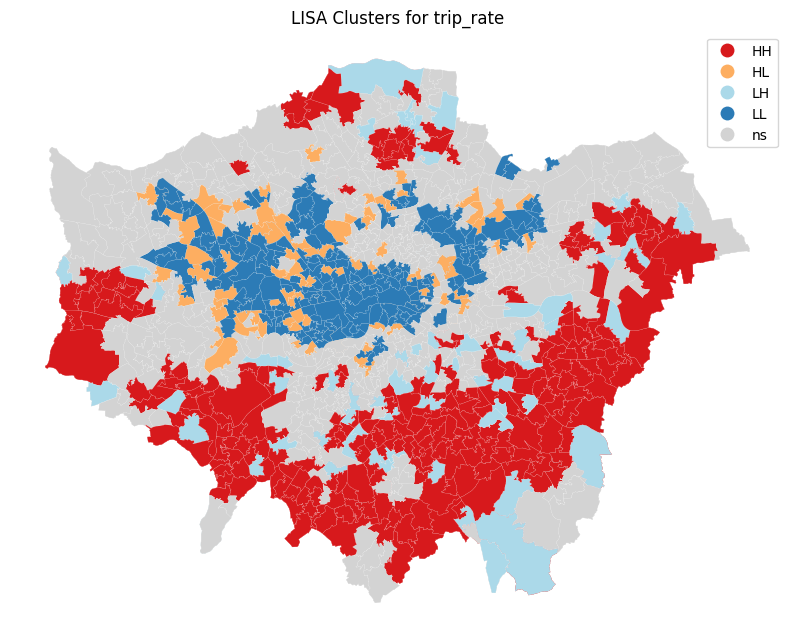

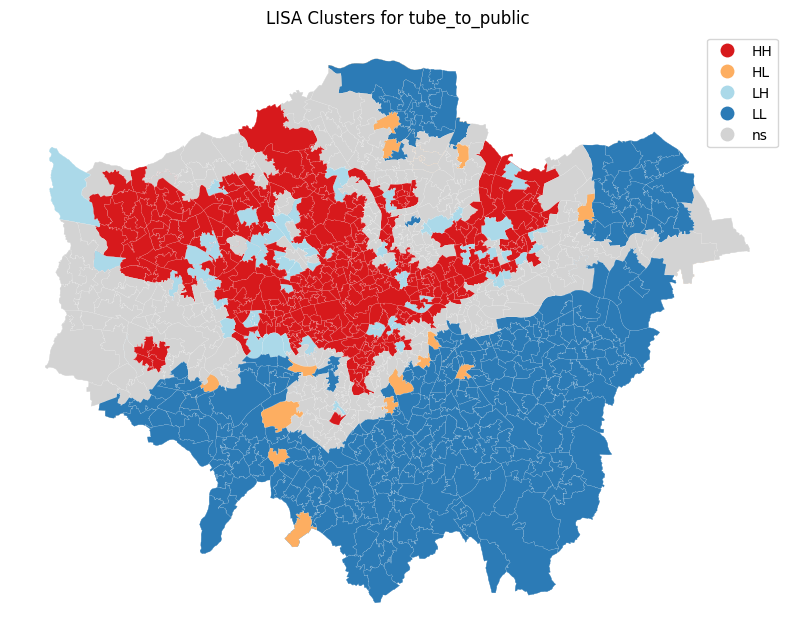

In [23]:
import matplotlib.pyplot as plt
import libpysal as lps
from splot.esda import lisa_cluster
import esda
import warnings
from shapely.errors import ShapelyDeprecationWarning

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=ShapelyDeprecationWarning)



# Load your GeoDataFrame and ensure it's exploded to handle MultiPolygons
gdf = map_msoa.copy()
gdf = gdf.explode(index_parts=True).reset_index(drop=True)


variables = ['attraction_count', 'passthrough_count',
             'resident_count', 'distance_sum_resident', 'distance_mean_resident',
             'time_sum_resident', 'time_mean_resident', 'trip_rate',
             'tube_to_public']

# Create a spatial weights matrix
w = lps.weights.Queen.from_dataframe(gdf)

# Loop through each variable and run LISA
for variable in variables:
    lisa = esda.Moran_Local(gdf[variable], w)
    
    # Plot LISA clusters
    fig, ax = plt.subplots(figsize=(10, 10))
    lisa_cluster(lisa, gdf, ax=ax)
    ax.set_title(f"LISA Clusters for {variable}")
    plt.show()


# OD Graph